# ML-Driven Bank Churn Prediction: Unlocking Customer Retention Insights, Analyzing Demographic and Financial Factors

## Project Title
ML-Driven Bank Churn Prediction: Unlocking Customer Retention Insights, Analyzing Demographic and Financial Factors

## Prepared By
Sweta Sunil Pandey

## Problem Definition
Customer churn is a significant issue for banks, impacting revenue and customer lifetime value.
The goal is to develop a machine learning model that predicts whether a customer will churn (leave the bank) based on their demographic, financial, and account activity data.

## *Objective
 1) Build a predictive model to classify customers as likely to churn (Exited = 1) or stay (Exited = 0).
 2) Identify key factors influencing customer attrition.
 3) Provide actionable insights for customer retention strategies.

## *Type of Problem

This is a Supervised Classification Problem.

Supervised Learning: The dataset contains historical customer data with labeled outcomes (Exited = 0 or 1), allowing us to train a model using both input features and the corresponding target variable.

Classification: The goal is to classify each customer into one of two categories:

Retained Customer (Exited = 0): Customers who continue their banking relationship.
Churned Customer (Exited = 1): Customers who have left the bank.

## *Business Impact of the Project

Customer churn is a critical issue for banks, as retaining existing customers is far more cost-effective than acquiring new ones. The Bank Churn Prediction project helps banks by providing data-driven insights that lead to strategic decision-making.

1) Revenue Protection & Growth - Retaining customers reduces revenue loss due to churn. Predicting at-risk customers allows targeted retention efforts, leading to increased customer for lifetime.
2) Cost Reduction - Acquiring new customers is more expensive than retaining existing ones. Focusing retention strategies on high-value customers optimizes marketing and operational costs.
3) Competitive Advantage - Data-driven decision-making enables banks to stay ahead of competitors. By using machine learning, banks can anticipate churn trends before they happen, giving them a competitive edge.
4) Personalized Customer Engagement - Proactive engagement improves customer satisfaction and brand loyalty. Banks can use churn predictions to offer personalized promotions, better interest rates, or loyalty programs to at-risk customers.
5) Regulatory Compliance & Risk Management - Predicting customer churn helps in managing financial risks, especially for loans and credit services.
Understanding why customers leave can improve service quality, helping in compliance with consumer protection regulations.

## Understanding the Dataset

Total Records: 10,004

Features: 13 independent variables + 1 target variable (Exited)

Feature Categories:

Personal & Demographic Information

   1)Gender – Male or Female
   
   2)Age – Customer's age
   
   3)Geography – Country of residence (France, Germany, Spain)
   
   4)Tenure – Number of years with the bank

Financial Information

   1)Balance – Customer's bank account balance (€)
   
   2)EstimatedSalary – Annual salary of the customer (€)
   
   3)HasCrCard – Whether the customer has a credit card (Yes/No)
   
   4)IsActiveMember – Whether the customer is an active bank user

Credit & Banking Behavior

   1)CreditScore – Customer's creditworthiness score
   
   2)NumberOfProducts – Number of products the customer has with the bank
   
   3)Exited (Target Variable) – 1 if the customer churned, 0 if retained

# Project Workflow
## Data Preparation

1) Load the dataset.
2) Explore the features and their significance.
3) Handle missing values and outliers.
4) Analyze class distribution to check for imbalances.

The dataset was provided in an Excel file with two separate sheets containing different customer-related and account-related information.
To ensure a comprehensive analysis and accurate predictions, we had to merge the sheets and the merged dataset will contains all relevant customer attributes, combining financial and demographic information for better insights.

In [6]:
import pandas as pd

file_path = r"E:\Learnbay Sweta\Placement project details\Bank_Churn_Messy.xlsx"
sheet1_name = "Customer_Info"  
sheet2_name = "Account_Info" 

df1 = pd.read_excel(file_path, sheet_name=sheet1_name)
df2 = pd.read_excel(file_path, sheet_name=sheet2_name)

common_column = "CustomerId"

merged_df = pd.merge(df1, df2, on=common_column, how="inner")

merged_df.to_excel("merged_final_dataset.xlsx", index=False)
print("Merged dataset saved as merged_final_dataset.xlsx")


Merged dataset saved as merged_final_dataset.xlsx


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Load Dataset
df = pd.read_excel("E:\Learnbay Sweta\Placement project details\merged_final_dataset.xlsx")

In [4]:
df.head()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0


In [5]:
df.shape

(10004, 14)

In [6]:
#Checking the datatypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10004 entries, 0 to 10003
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerId       10004 non-null  int64  
 1   Surname          10001 non-null  object 
 2   CreditScore      10004 non-null  int64  
 3   Geography        10004 non-null  object 
 4   Gender           10004 non-null  object 
 5   Age              10001 non-null  float64
 6   Tenure_x         10004 non-null  int64  
 7   EstimatedSalary  10004 non-null  object 
 8   Balance          10004 non-null  object 
 9   NumOfProducts    10004 non-null  int64  
 10  HasCrCard        10004 non-null  object 
 11  Tenure_y         10004 non-null  int64  
 12  IsActiveMember   10004 non-null  object 
 13  Exited           10004 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 1.1+ MB


In [7]:
#Checking for duplicates
df.duplicated().sum()

3

In [8]:
df.drop_duplicates()

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure_x,EstimatedSalary,Balance,NumOfProducts,HasCrCard,Tenure_y,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,0,1,Yes,2,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,2,Yes,1
2,15647311,Hill,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,1,Yes,0
3,15619304,Onio,502,French,Female,42.0,8,€113931.57,€159660.8,3,No,8,No,1
4,15701354,Boni,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,1,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9996,15606229,Obijiaku,771,France,Male,39.0,5,€96270.64,€0.0,2,No,5,No,0
9997,15569892,Johnstone,516,French,Male,35.0,10,€101699.77,€57369.61,1,Yes,10,Yes,0
9998,15584532,Liu,709,FRA,Female,36.0,7,€42085.58,€0.0,1,Yes,7,Yes,1
9999,15682355,Sabbatini,772,Germany,Male,42.0,3,€92888.52,€75075.31,2,No,3,No,1


In [9]:
# checking whether tenure_x and tenure_y are same columns

difference_count = (df['Tenure_x'] != df['Tenure_y']).sum()
print(f"Number of different values between Tenure_x and Tenure_y: {difference_count}")

# Optionally, show the actual rows where they differ
if difference_count > 0:
    print("\nRows where Tenure_x and Tenure_y differ:")
    display(df[df['Tenure_x'] != df['Tenure_y']])


Number of different values between Tenure_x and Tenure_y: 0


In [10]:
df.drop(columns='Tenure_y', inplace=True)

df.rename(columns={'Tenure_x': 'Tenure'}, inplace=True)

In [11]:
df.head(2)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,0,1,Yes,Yes,1
1,15634602,Hargrave,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1


In [12]:
# No of missing values
df.isnull().sum()

CustomerId         0
Surname            3
CreditScore        0
Geography          0
Gender             0
Age                3
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [13]:
df.drop(columns=['Surname'], inplace=True) #since this column is not useful for prediction i am dropping it

In [25]:
df.head(2)

,CustomerId,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,15634602,619,FRA,Female,42.0,2,€101348.88,0,1,Yes,Yes,1
1,15634602,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1


In [27]:
df['Age'].fillna(df['Age'].median(), inplace=True)

In [29]:
df.isnull().sum()

CustomerId         0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
EstimatedSalary    0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
Exited             0
dtype: int64

In [31]:
#summary stats
df.describe()

,CustomerId,CreditScore,Age,Tenure,NumOfProducts,Exited
count,1.000400e+04,10004.000000,10004.000000,10004.000000,10004.000000,10004.000000
mean,1.569092e+07,650.568073,38.918533,5.012195,1.529988,0.203719
std,7.193218e+04,96.665531,10.487205,2.891806,0.581635,0.402782
min,1.556570e+07,350.000000,18.000000,0.000000,1.000000,0.000000
25%,1.562839e+07,584.000000,32.000000,3.000000,1.000000,0.000000
50%,1.569071e+07,652.000000,37.000000,5.000000,1.000000,0.000000
75%,1.575322e+07,718.000000,44.000000,7.000000,2.000000,0.000000
max,1.581569e+07,850.000000,92.000000,10.000000,4.000000,1.000000


In [33]:
numerical_columns = [col for col in df.columns if df[col].dtype in ['float64', 'int64']]
print(numerical_columns)

['CustomerId', 'CreditScore', 'Age', 'Tenure', 'NumOfProducts', 'Exited']


In [35]:
#Identifying of outliers

def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    print(f"{column}: {len(outliers)} outliers")
    return outliers

for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)

CustomerId: 0 outliers
CreditScore: 15 outliers
Age: 359 outliers
Tenure: 0 outliers
NumOfProducts: 60 outliers
Exited: 2038 outliers


In [37]:
#looking for imbalance in data

Exited = len(df[df.Exited ==1])
no_Exited = len(df[df.Exited ==0])
percent_Exited = (Exited / (Exited + no_Exited))*100
percent_no_Exited = ( no_Exited / (Exited + no_Exited))*100
print ("Percent of Exited: {:.2f} %".format(percent_Exited))
print ("Percent of No Exited: {:.2f} %".format(percent_no_Exited))

Percent of Exited: 20.37 %
Percent of No Exited: 79.63 %


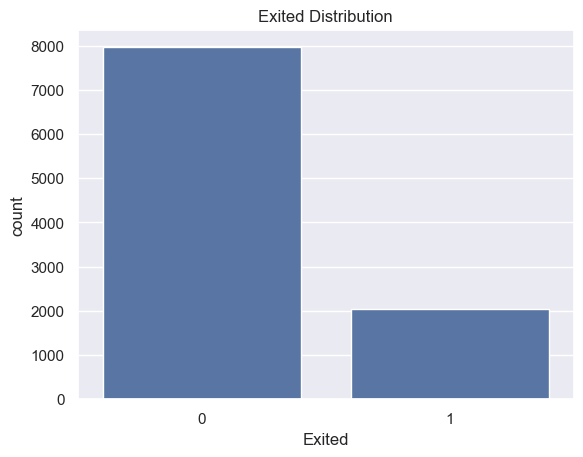

In [39]:
sns.countplot(x='Exited', data=df) 
plt.title('Exited Distribution')
plt.show()

Why is Class Imbalance a Problem?
1) Creates Bias in Model Training
A model trained here on this dataset may learn to predict "Not Exited" most of the time because it's the majority class.
If the model predicts "Not Exited" 100% of the time, it will still be 79.63% accurate, but it fails to identify actual churners, which is critical for business decisions.

2) Poor Predictive Performance
The model may have high accuracy but low recall for the minority class (churners).
Recall (Sensitivity) for churners is important because banks want to identify customers who are likely to leave.

How to Handle Class Imbalance?
To improve the models performance in predicting churn, we use techniques like:

a)Resampling Techniques:
1) Oversampling the minority class (using SMOTE – Synthetic Minority Over-sampling Technique)
2) Undersampling the majority class (randomly removing some "Not Exited" samples).


### Key factors influencing customer attrition.

Feature importance has been extracted using .feature_importances_

1) Age – Older customers are more likely to churn.

2) EstimatedSalary – Impacts customer churn, possibly due to satisfaction or financial planning.

3) Balance – Customer with high or zero balance shows higher churn probability.

4) IsActiveMember – Inactivity is a strong churn signal.

5) NumOfProducts – Customers with fewer products tend to churn more.

6) CreditScore – Low credit score may affeect trust or offer from bank, which impacts satisfaction.

7) Geography – Customer from certain region like Spain and Germany shows higher churn.

8) Gender – As per model, we have male customer high tendency to churn.


### Target variable (Exited) distribution

There is class imbalance in the dataset. Only 20% customer exited the bank. This means churned customer are minority class which can bias the model towards predicting non-churn. So, we used SMOTE( Synthetic Minority Oversampling Technique) before model training.

### Missing value, duplicate, inconsistencies in data.

Duplicated - 3 - was due to mergering of 2 sheets

Missing value - 3 in surname and 3 in age (Dropped surname as it was not useful for prediction) age - imputed with median

Inconsistencies - tenure - after checking for (tenure_x and tenure_y) whether columns are same we dropped 1 tenure_y column and renamed it to tenure.

                  customerId - dropped it since it was just identifiers
                  
                  surname - dropped as it is not useful for prediction
                  
                  gender & geography - did one-hot encoding to convert them into numeric feature
                  
                  balance & salary - replaced euro sign with space
                  
                  hascrcd & Isactmember - converted binary to categorical column by map function.
                  
Outliers - credit score - 15

           Age - 359
           
           no of product - 60
           
           exited - 2038
           
           Exited is target column so we donot touch that
           
           for Credit score, Age, no of product - Applied quantile based capping (it retains all rows and reduces skewness from extreme values).
           

## Exploratory Data Analysis (EDA)

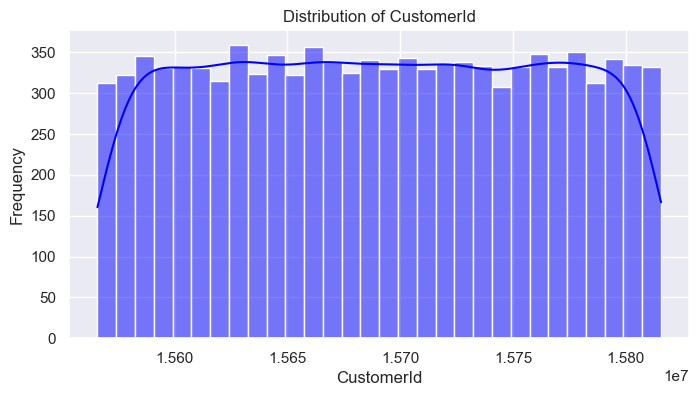

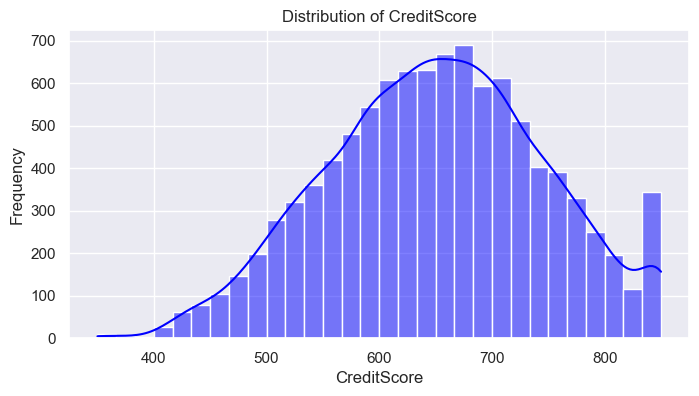

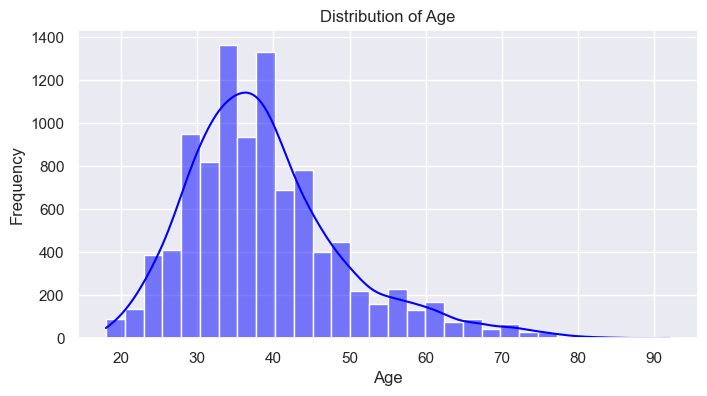

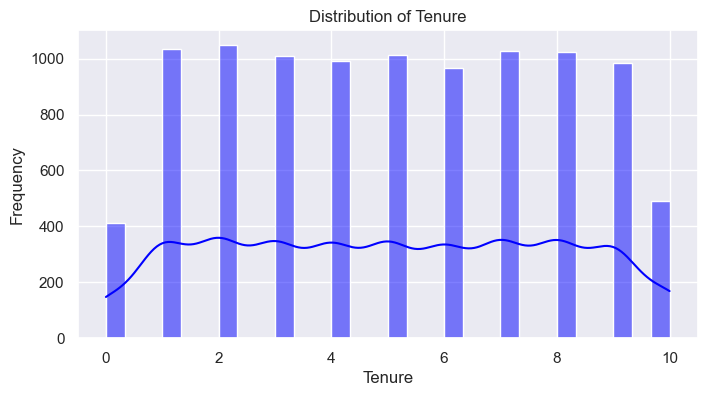

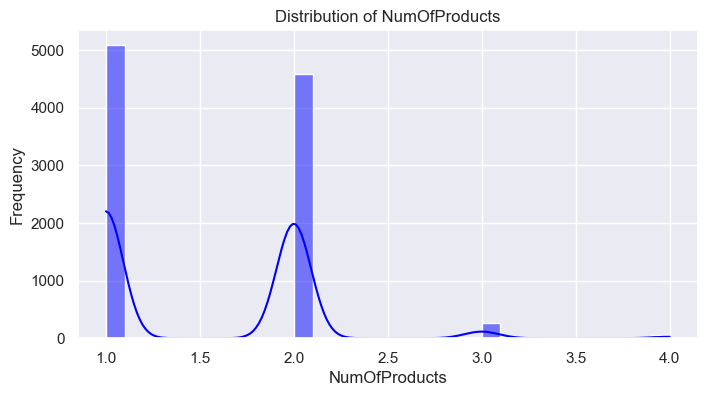

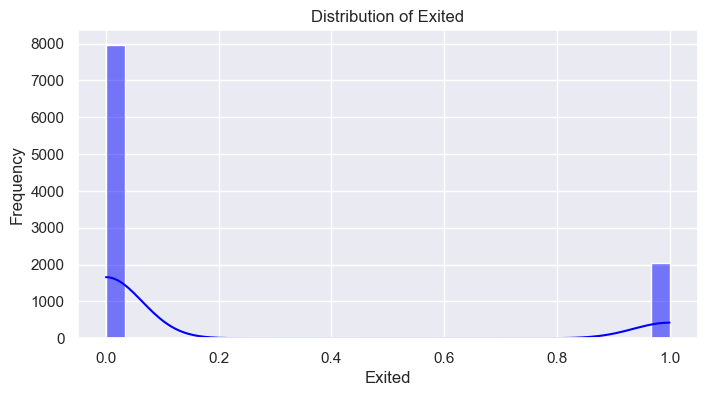

In [41]:
#univariate analysis of numerical columns
for col in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.histplot(df[col], kde=True, bins=30, color='blue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

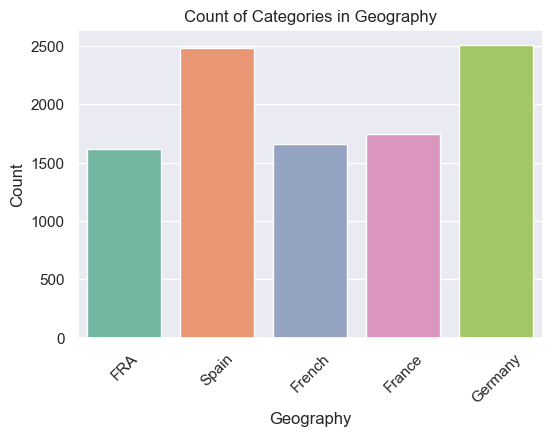

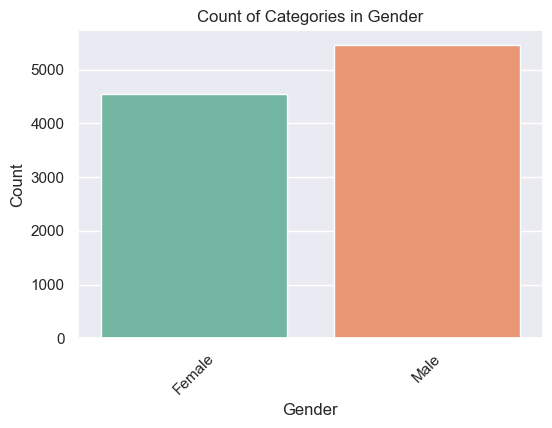

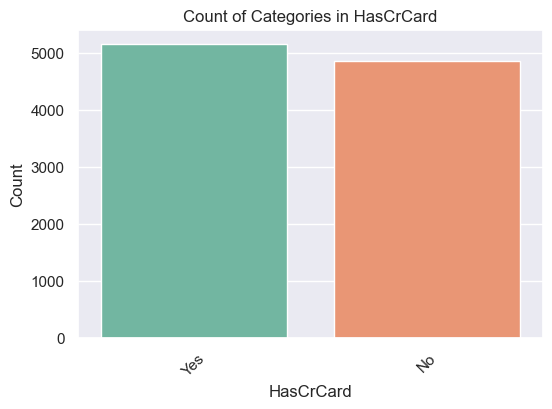

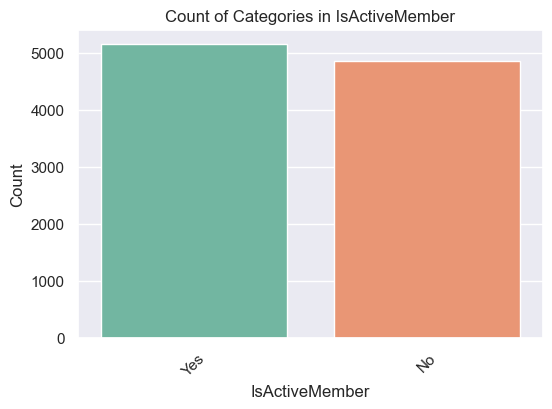

In [43]:
#univariate analysis for categorical columns
categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, palette='Set2')
    plt.title(f'Count of Categories in {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

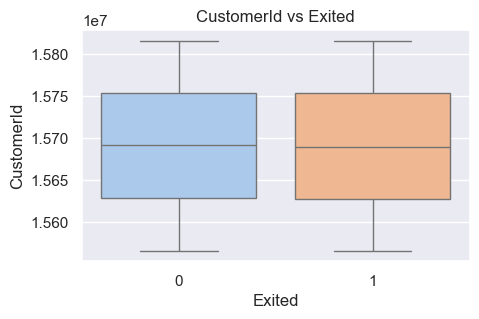

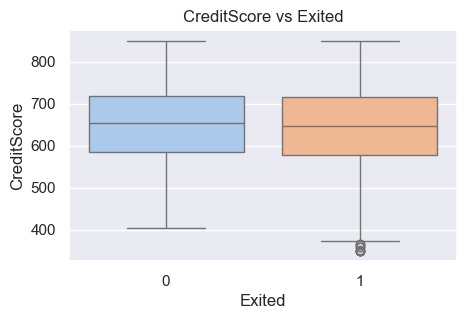

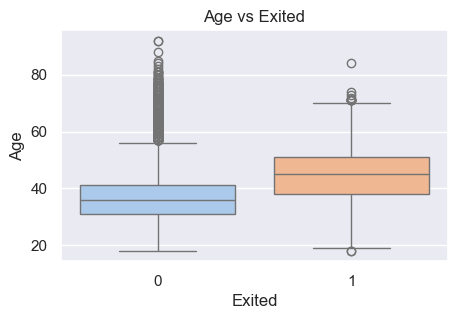

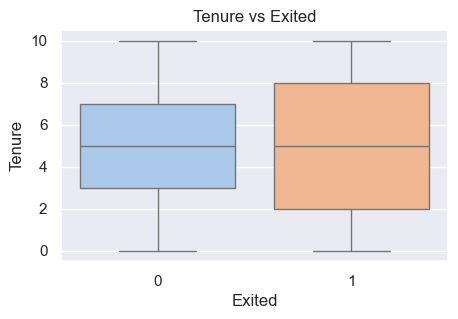

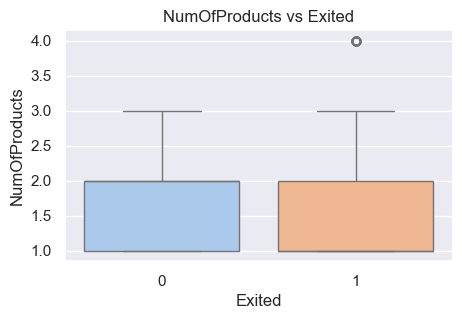

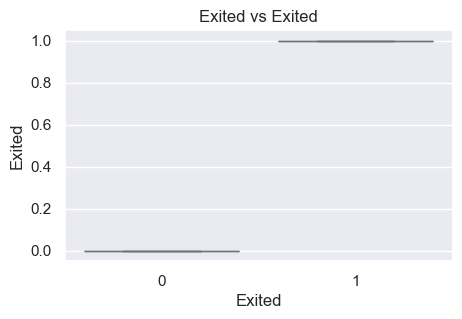

In [45]:
#bivariate analysis of numerical feature

for col in numerical_columns:
    plt.figure(figsize=(5, 3))
    sns.boxplot(x='Exited', y=col, data=df, palette='pastel')
    plt.title(f'{col} vs Exited')
    plt.xlabel('Exited')
    plt.ylabel(col)
    plt.show()

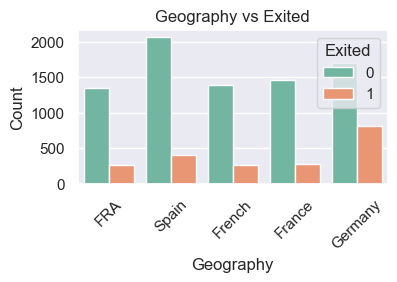

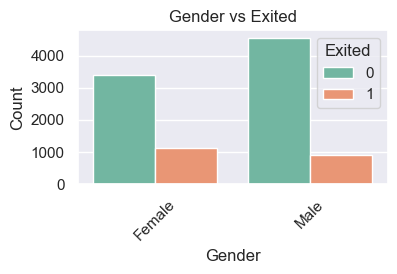

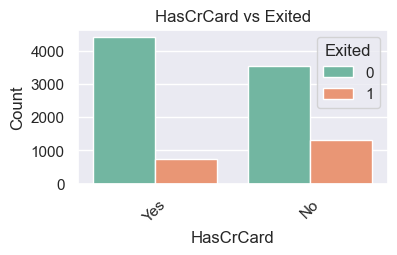

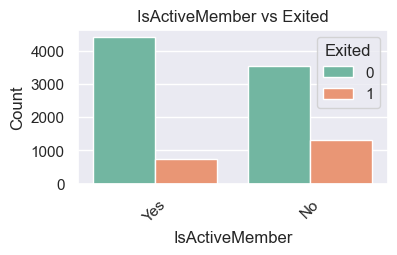

In [47]:
#bivariate analysis of categorical columns

categorical_cols = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

for col in categorical_cols:
    plt.figure(figsize=(4, 2))
    sns.countplot(data=df, x=col, hue='Exited', palette='Set2')
    plt.title(f'{col} vs Exited')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

In [49]:
corr_matrix = df[numerical_columns].corr()

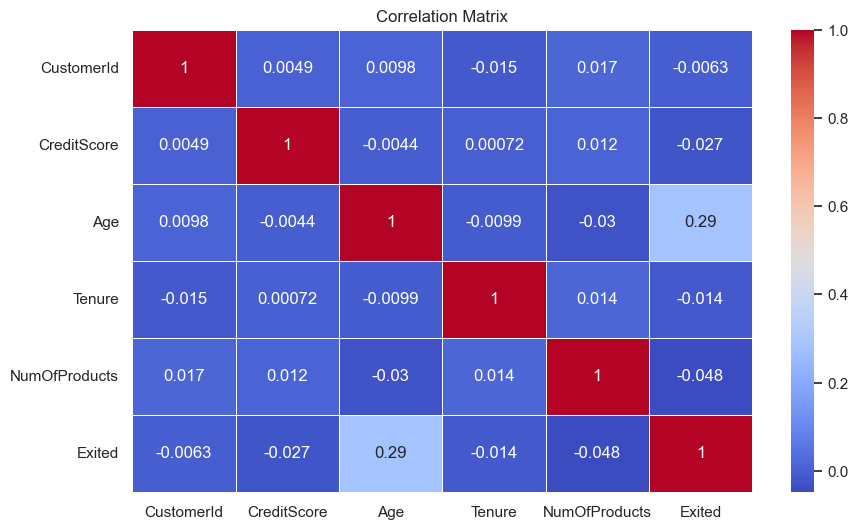

In [51]:
# multivariate analysis of numerical features

plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()


In [53]:
correlation_with_Exited = corr_matrix['Exited'].sort_values(ascending=False)

print("Correlation with Exited:\n", correlation_with_Exited)

Correlation with Exited:
 Exited           1.000000
Age              0.285446
CustomerId      -0.006268
Tenure          -0.014149
CreditScore     -0.027365
NumOfProducts   -0.047843
Name: Exited, dtype: float64


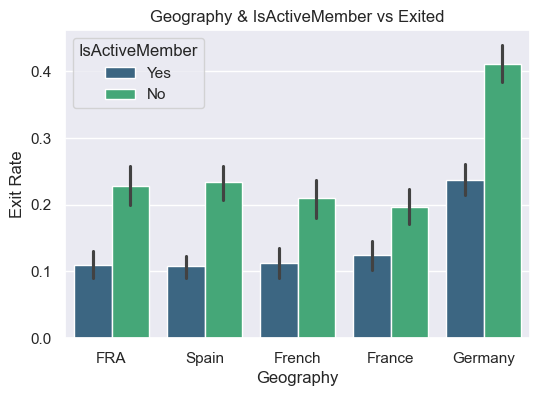

In [55]:
#multivariate analysis of categorical feature
plt.figure(figsize=(6, 4))
sns.barplot(data=df, x='Geography', y='Exited', hue='IsActiveMember', palette='viridis')
plt.title('Geography & IsActiveMember vs Exited')
plt.ylabel('Exit Rate')
plt.show()

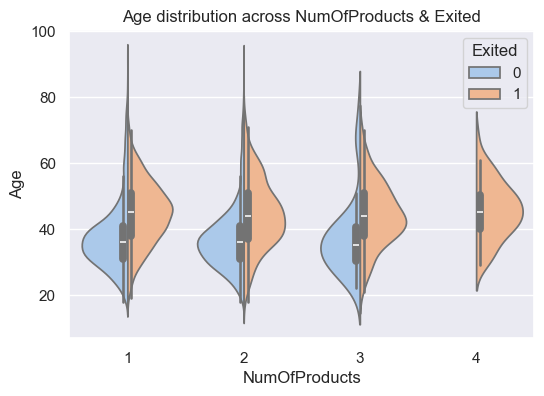

In [57]:
plt.figure(figsize=(6, 4))
sns.violinplot(data=df, x='NumOfProducts', y='Age', hue='Exited', split=True, palette='pastel')
plt.title('Age distribution across NumOfProducts & Exited')
plt.show()

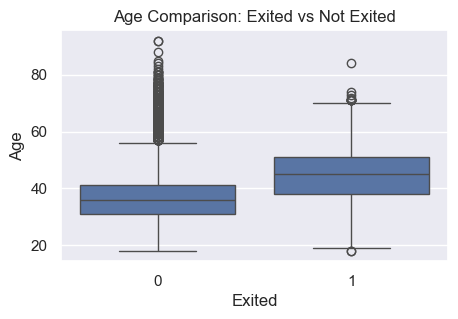

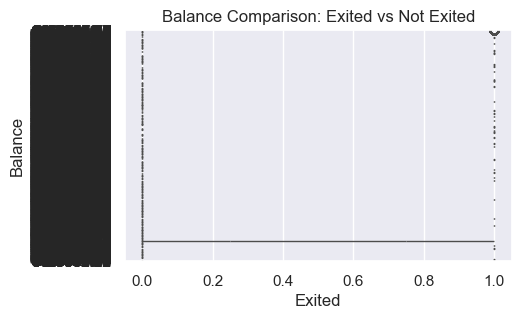

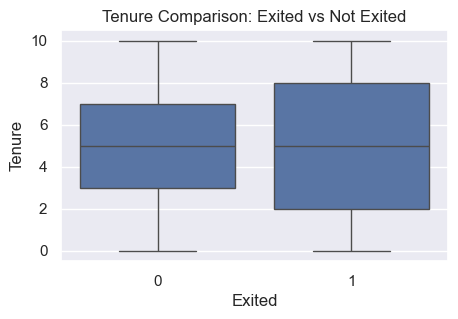

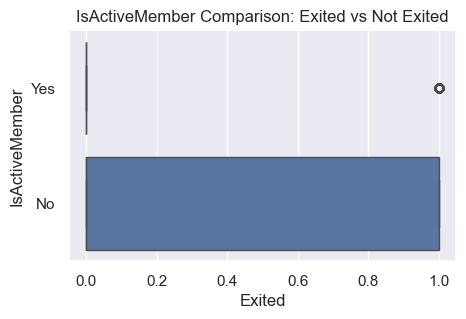

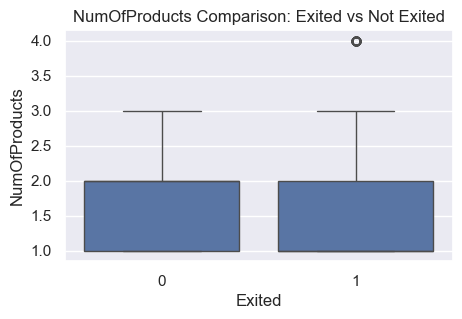

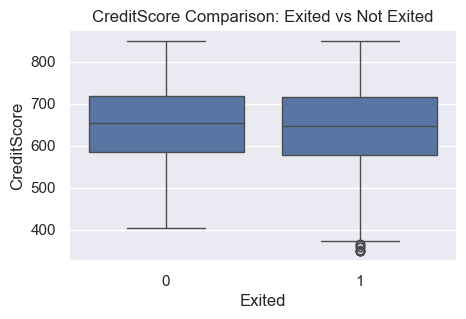

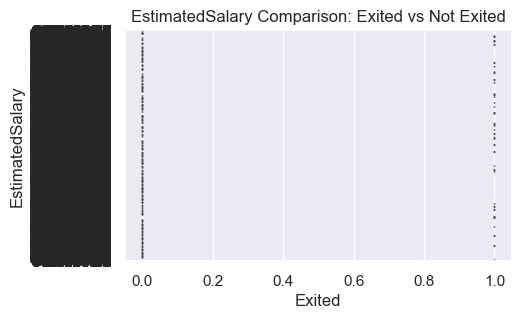

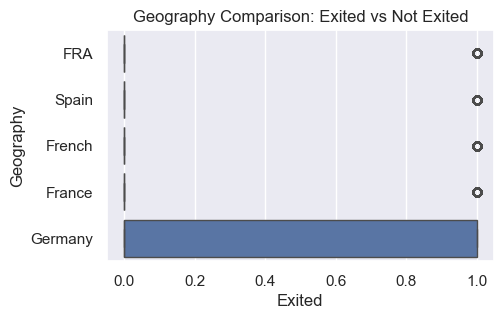

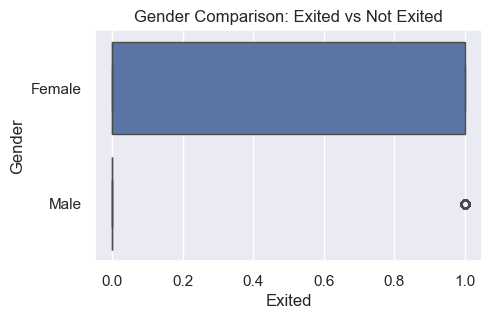

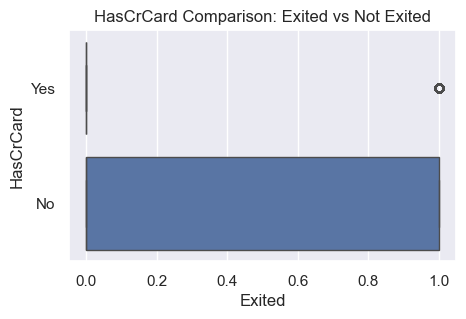

In [59]:
# Comparing exited and not exited groups across features.

features = [
    'Age', 
    'Balance',
    'Tenure',
    'IsActiveMember', 
    'NumOfProducts', 
    'CreditScore', 
    'EstimatedSalary', 
    'Geography',
    'Gender',
    'HasCrCard'
]

for feature in features:
    if feature in df.columns:
        plt.figure(figsize=(5, 3))
        sns.boxplot(x='Exited', y=feature, data=df)
        plt.title(f'{feature} Comparison: Exited vs Not Exited')
        plt.show()

CustomerId: 0 outliers


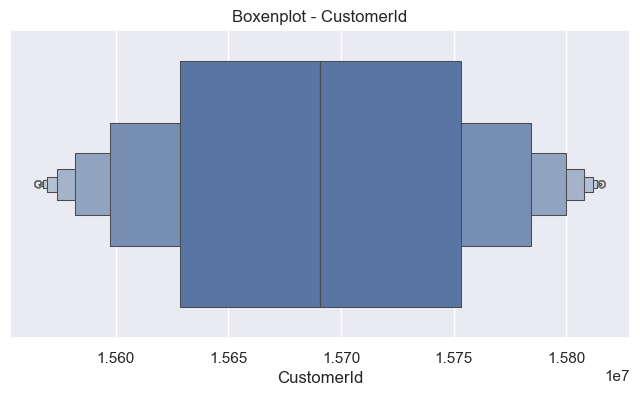

CreditScore: 15 outliers


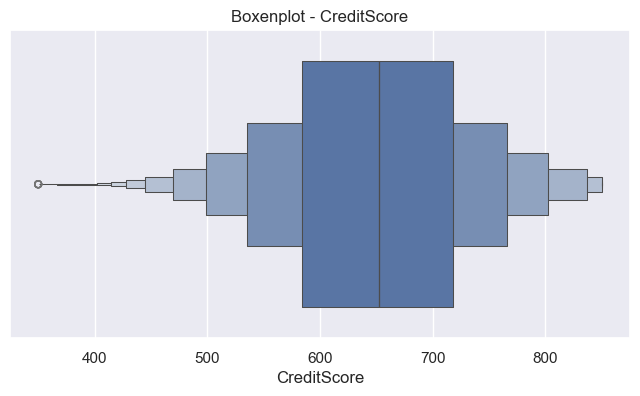

Age: 359 outliers


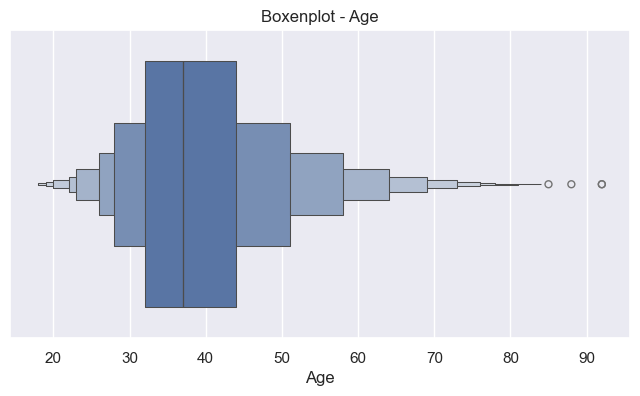

Tenure: 0 outliers


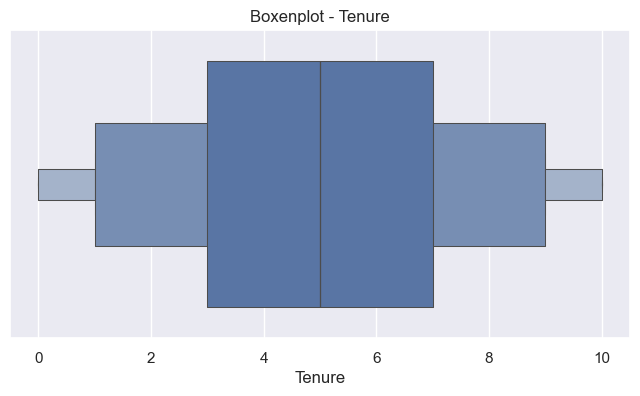

NumOfProducts: 60 outliers


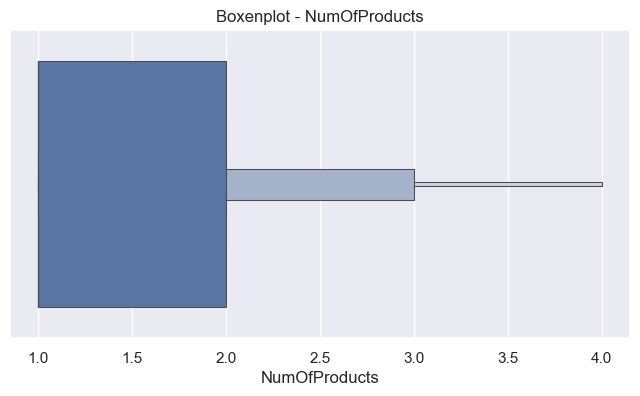

Exited: 2038 outliers


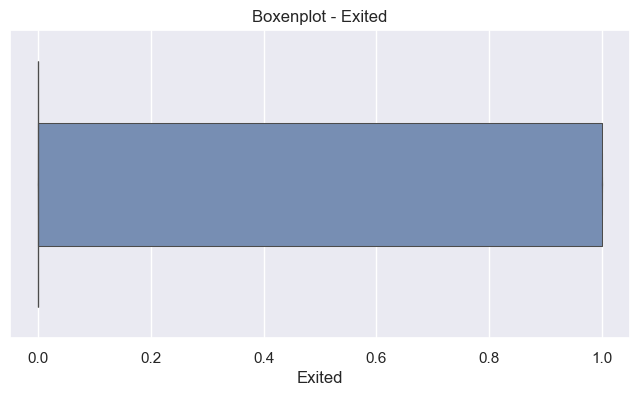

In [60]:
#Identifing outliers in independent features

for feature in numerical_columns:
    if feature in df.columns:
        detect_outliers_iqr(df, feature)

        plt.figure(figsize=(8, 4))
        sns.boxenplot(x=df[feature])
        plt.title(f'Boxenplot - {feature}')
        plt.show()

In [63]:
df.drop(columns='CustomerId', inplace=True)

In [65]:
# Cap CreditScore because distribution is reasonable, outliers may be edge customers with very low scores
q5 = df['CreditScore'].quantile(0.05)
q95 = df['CreditScore'].quantile(0.95)
df['CreditScore'] = np.clip(df['CreditScore'], q5, q95)

# Cap Age (older customers may be at higher churn risk)
q5_age = df['Age'].quantile(0.05)
q95_age = df['Age'].quantile(0.95)
df['Age'] = np.clip(df['Age'], q5_age, q95_age)

# Cap NumOfProducts 
q5_np = df['NumOfProducts'].quantile(0.05)
q95_np = df['NumOfProducts'].quantile(0.95)
df['NumOfProducts'] = np.clip(df['NumOfProducts'], q5_np, q95_np)


In [67]:
# Excluding customerId, since we dropped it
numerical_columns = [col for col in numerical_columns if col != 'CustomerId']

for column in numerical_columns:
    outliers = detect_outliers_iqr(df, column)

CreditScore: 0 outliers
Age: 0 outliers
Tenure: 0 outliers
NumOfProducts: 0 outliers
Exited: 2038 outliers


### features showing a strong correlation with target

Only Age shows meaningful positive correlation with Exited(0.29). All other features are having very weak correlation.
This does not mean they are not imp, they might have hidden non linear relationship. So these hidden pattern can be captured bymodels like Random Forest
and gradient boosting.

## Data Preprocessing

1) Convert categorical variables into numerical form (e.g., one-hot encoding).
2) Normalize numerical features (e.g., standardization or MinMax scaling).
3) Split the dataset into training (80%) and testing (20%) sets.

In [69]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,FRA,Female,42.0,2,€101348.88,0,1,Yes,Yes,1
1,619,FRA,Female,42.0,2,€101348.88,€0.0,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,€112542.58,€83807.86,1,Yes,Yes,0
3,502,French,Female,42.0,8,€113931.57,€159660.8,2,No,No,1
4,699,FRA,Female,39.0,1,€93826.63,€0.0,2,No,No,0


In [71]:
# Removing euro signs and commas (if any),convert to float

df['EstimatedSalary'] = df['EstimatedSalary'].replace('[€,]', '', regex=True).astype(float)
df['Balance'] = df['Balance'].replace('[€,]', '', regex=True).astype(float)


In [73]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
1,619,FRA,Female,42.0,2,101348.88,0.00,1,Yes,Yes,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,Yes,Yes,0


In [74]:
# converting binary categorical columns
df['HasCrCard'] = df['HasCrCard'].map({'Yes': 1, 'No': 0})
df['IsActiveMember'] = df['IsActiveMember'].map({'Yes': 1, 'No': 0})


In [75]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Exited
0,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
1,619,FRA,Female,42.0,2,101348.88,0.00,1,1,1,1
2,608,Spain,Female,41.0,1,112542.58,83807.86,1,1,1,0


In [79]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Split data into training and test set
#lets first split our target and features
X = df.drop(columns=['Exited'])
y = df['Exited'] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

X_train = pd.get_dummies(X_train, columns=categorical_columns, drop_first=True)
X_test = pd.get_dummies(X_test, columns=categorical_columns, drop_first=True)

# Align test set columns with training set
missing_cols = set(X_train.columns) - set(X_test.columns)
for col in missing_cols:
    X_test[col] = 0
X_test = X_test[X_train.columns]

numerical_columns = X_train.select_dtypes(include=['float64', 'int64']).columns.tolist()

scaler = StandardScaler()
X_train[numerical_columns] = scaler.fit_transform(X_train[numerical_columns])
X_test[numerical_columns] = scaler.transform(X_test[numerical_columns])

X_train.head()

,CreditScore,Age,Tenure,EstimatedSalary,Balance,NumOfProducts,HasCrCard,IsActiveMember,Geography_France,Geography_French,Geography_Germany,Geography_Spain,Gender_Male
456,-1.605429,-0.288383,-0.00337,1.064739,-1.225688,1.018795,-1.02775,-1.02775,False,True,False,False,True
8594,-0.454607,-0.288383,0.68823,-0.928773,0.626943,-0.981552,0.97300,0.97300,False,False,True,False,True
8186,0.784739,0.139924,0.34243,0.878460,0.205159,1.018795,0.97300,0.97300,False,False,True,False,False
2010,0.862198,0.782384,-0.00337,0.077804,0.665057,-0.981552,-1.02775,-1.02775,False,False,True,False,True
1642,0.674083,1.531921,-1.04077,-1.191558,0.556327,1.018795,-1.02775,-1.02775,False,False,False,True,True


In [81]:
# Applying SMOTE(Synthetic Minority Over-sampling Technique) to handle class imbalance..SMOTE should be applied after splitting the data
#into train and test sets, and after separating features and target to ensure there is no data leakage into test data.

from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())


Before SMOTE: Exited
0    6373
1    1630
Name: count, dtype: int64
After SMOTE: Exited
0    6373
1    6373
Name: count, dtype: int64


### Importance of Normalization

Normalization is necessary to ensure that all numeriacal feature contribute equally to model's learning process, specially for algorithms that are
sensitive to feature scales like logistic and KNN. Random forest and Gradient boosting doesnot affects by feature scaling.

## Model Selection & Training & Model Evaluation

1) Train a Logistic Regression model as a baseline.
2) Experiment with Decision Tree, Random Forest, knn, and Gradient Boosting models.
3) Compare models based on accuracy, precision, recall, and F1-score.
4) Compute evaluation metrics: Precision, Recall, F1-score, ROC AUC.
5) Generate a confusion matrix to analyze false positives and false negatives.
6) Use ROC-AUC to measure overall model performance.


 Logistic Regression
              precision    recall  f1-score   support

           0     0.8400    0.9623    0.8970      1593
           1     0.6591    0.2843    0.3973       408

    accuracy                         0.8241      2001
   macro avg     0.7495    0.6233    0.6471      2001
weighted avg     0.8031    0.8241    0.7951      2001

ROC-AUC Score: 0.7904788720258975


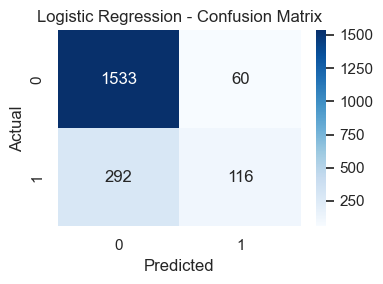

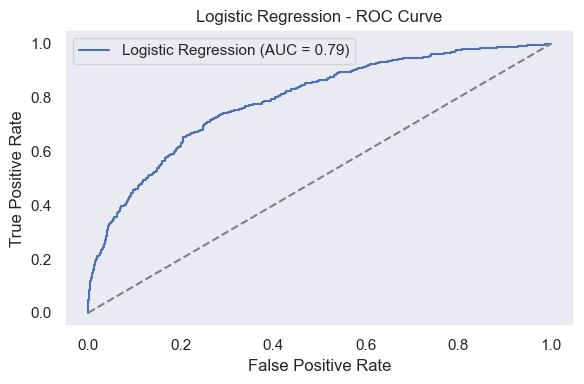


 Random Forest
              precision    recall  f1-score   support

           0     0.8591    0.9567    0.9053      1593
           1     0.6960    0.3873    0.4976       408

    accuracy                         0.8406      2001
   macro avg     0.7776    0.6720    0.7014      2001
weighted avg     0.8258    0.8406    0.8221      2001

ROC-AUC Score: 0.8117076240414558


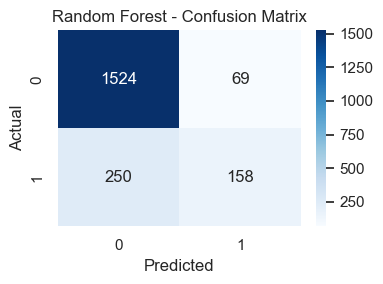

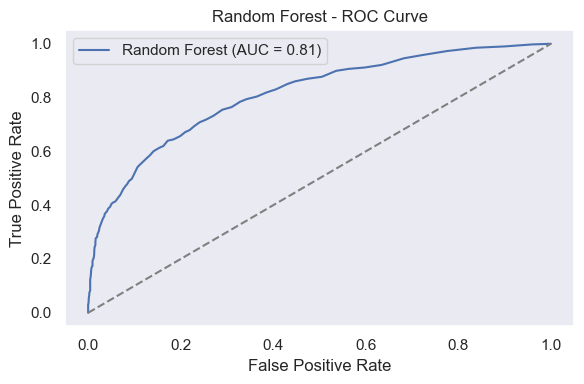


 Gradient Boosting
              precision    recall  f1-score   support

           0     0.8617    0.9623    0.9093      1593
           1     0.7297    0.3971    0.5143       408

    accuracy                         0.8471      2001
   macro avg     0.7957    0.6797    0.7118      2001
weighted avg     0.8348    0.8471    0.8287      2001

ROC-AUC Score: 0.8282021220289747


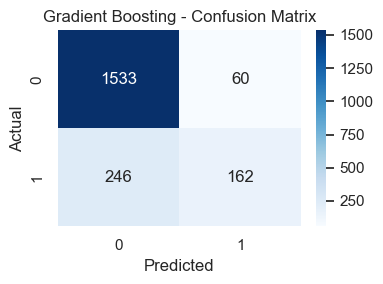

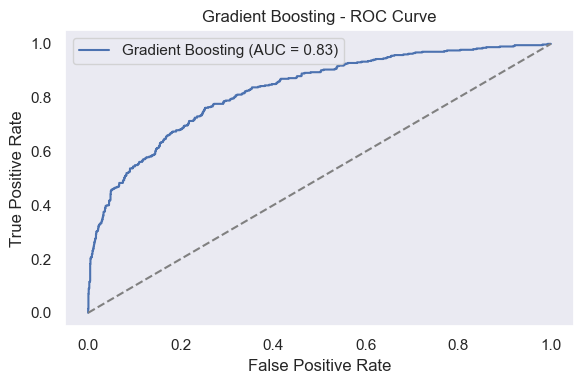


 Decision Tree
              precision    recall  f1-score   support

           0     0.8586    0.8311    0.8447      1593
           1     0.4139    0.4657    0.4383       408

    accuracy                         0.7566      2001
   macro avg     0.6363    0.6484    0.6415      2001
weighted avg     0.7680    0.7566    0.7618      2001

ROC-AUC Score: 0.6484112477382667


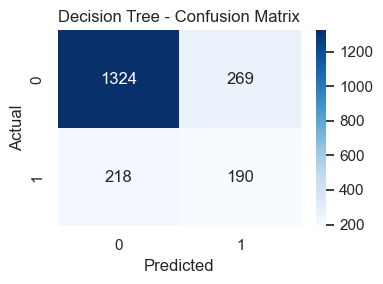

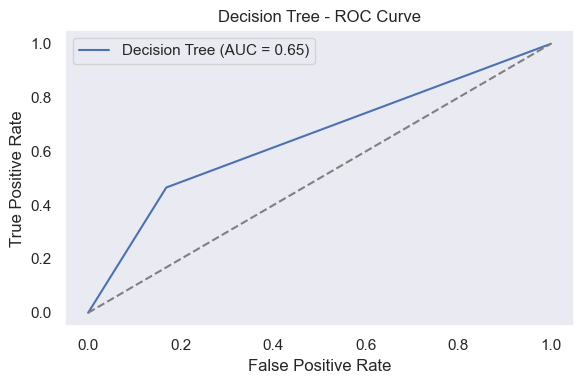


 KNN
              precision    recall  f1-score   support

           0     0.8526    0.9335    0.8912      1593
           1     0.5875    0.3701    0.4541       408

    accuracy                         0.8186      2001
   macro avg     0.7201    0.6518    0.6727      2001
weighted avg     0.7986    0.8186    0.8021      2001

ROC-AUC Score: 0.7450434191253401


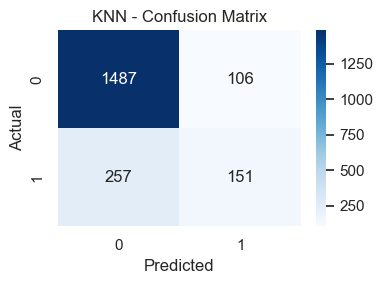

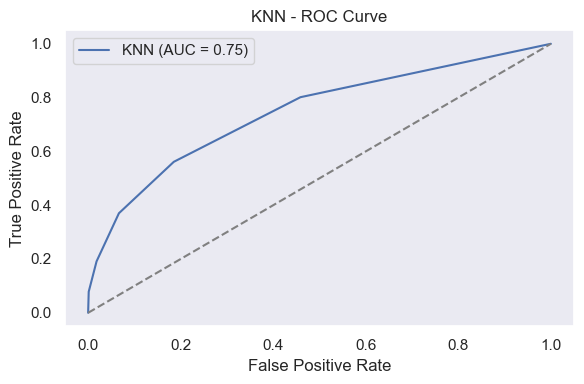

In [83]:
# model building and putting them into pipeline

from sklearn.pipeline import Pipeline
from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    roc_auc_score,
    roc_curve
)
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import seaborn as sns

# Defining model into pipelines
pipelines = {
    'Logistic Regression': Pipeline([('clf', LogisticRegression(max_iter=1000))]),
    'Random Forest': Pipeline([('clf', RandomForestClassifier(random_state=42))]),
    'Gradient Boosting': Pipeline([('clf', GradientBoostingClassifier(random_state=42))]),
    'Decision Tree': Pipeline([('clf', DecisionTreeClassifier(random_state=42))]),
    'KNN': Pipeline([('clf', KNeighborsClassifier())])
}

# Evaluating all models
for name, pipeline in pipelines.items():
    print(f"\n {name}")
    
    # Fitting the model
    pipeline.fit(X_train, y_train)
    
    # Predicting
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    # Classification report
    print(classification_report(y_test, y_pred, digits=4))
    print("ROC-AUC Score:", roc_auc_score(y_test, y_proba))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4, 3))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.tight_layout()
    plt.show()

    # ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    plt.figure(figsize=(6, 4))
    plt.plot(fpr, tpr, label=f"{name} (AUC = {roc_auc_score(y_test, y_proba):.2f})")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.title(f"{name} - ROC Curve")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.grid()
    plt.tight_layout()
    plt.show()


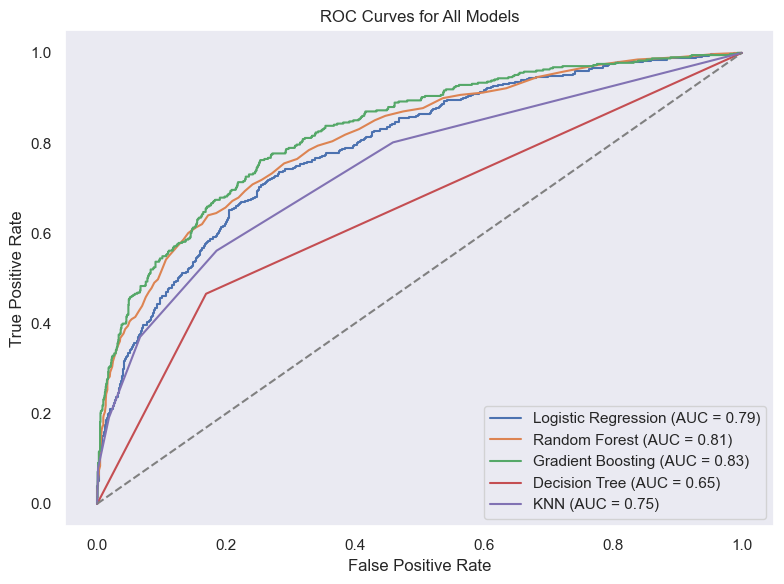

In [95]:
# Store ROC data for all models
plt.figure(figsize=(8, 6))
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_proba = pipeline.predict_proba(X_test)[:, 1]
    fpr, tpr, _ = roc_curve(y_test, y_proba)
    auc_score = roc_auc_score(y_test, y_proba)
    plt.plot(fpr, tpr, label=f"{name} (AUC = {auc_score:.2f})")

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')

plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid()
plt.tight_layout()
plt.show()


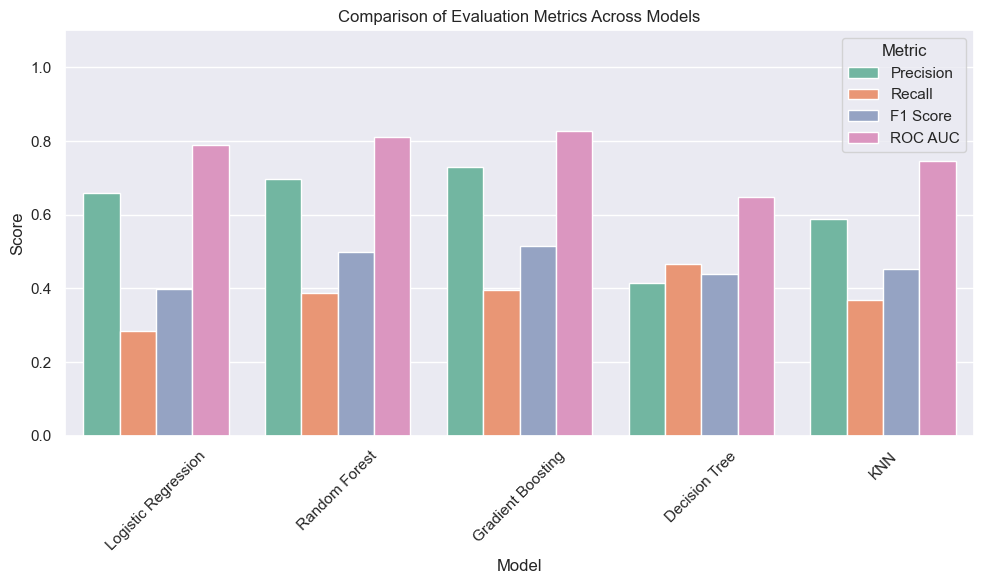

In [97]:
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score

# Create empty list to store metrics
metrics = []

# Evaluate and collect metrics
for name, pipeline in pipelines.items():
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    y_proba = pipeline.predict_proba(X_test)[:, 1]

    metrics.append({
        'Model': name,
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred),
        'ROC AUC': roc_auc_score(y_test, y_proba)
    })

# Convert to DataFrame
metrics_df = pd.DataFrame(metrics)

# Melt the DataFrame to long format for seaborn
metrics_melted = pd.melt(metrics_df, id_vars='Model', var_name='Metric', value_name='Score')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(data=metrics_melted, x='Model', y='Score', hue='Metric', palette='Set2')

plt.title('Comparison of Evaluation Metrics Across Models')
plt.ylim(0, 1.1)
plt.xticks(rotation=45)
plt.legend(title='Metric')
plt.tight_layout()
plt.show()


### Advantage of using a Logistic Regression model as a baseline model.

1) Simple and interpretable and is quick to train, this makes it ideal for early experimenting and pipeline testing.

2) It outputs probablities which is perfect when evaluating using ROC-AUC score.

3) Helps in feature importance analysis.

### Best Performing Model 

After comparing ROC-AUC scores before and after hyperparameter tuning, Gradient Boosting consistently showed the highest score, indicating better capability in distinguishing between churned and retained customers.

It performed well beacuse:- 
1) It captures non linear relationship
2) Handles imbalance data properly.
3) Strong learner combinations - Many weak learners (DT) in sequential manner are made here and each new tree fixex the error from previous one which makes it robust and accurate.

## Hyperparameter Tuning

Optimize model hyperparameters using Grid Search or Random Search.

Implement Cross-Validation to improve model reliability.

Compare results before and after tuning.

In [111]:
from sklearn.model_selection import GridSearchCV
#hyperparameter tuning for logistic regression
param_grid_lr = {
    'clf__C': [0.01, 0.1, 1, 10],
    'clf__penalty': ['l1', 'l2'],
    'clf__solver': ['liblinear']  # supports both l1 and l2
}

grid_lr = GridSearchCV(pipelines['Logistic Regression'], param_grid_lr, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_lr.fit(X_train, y_train)

print(" Best Parameters - Logistic Regression:", grid_lr.best_params_)
print(" Best F1 Score - Logistic Regression:", grid_lr.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
 Best Parameters - Logistic Regression: {'clf__C': 0.1, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
 Best F1 Score - Logistic Regression: 0.7942006016186559


In [112]:
#hyperparameter tuning for random forest
param_grid_rf = {
    'clf__n_estimators': [100, 200],
    'clf__max_depth': [None, 10, 20],
    'clf__min_samples_split': [2, 5],
    'clf__min_samples_leaf': [1, 2]
}

grid_rf = GridSearchCV(pipelines['Random Forest'], param_grid_rf, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_rf.fit(X_train, y_train)

print("🔸 Best Parameters - Random Forest:", grid_rf.best_params_)
print("🔸 Best F1 Score - Random Forest:", grid_rf.best_score_)


Fitting 5 folds for each of 24 candidates, totalling 120 fits
🔸 Best Parameters - Random Forest: {'clf__max_depth': 10, 'clf__min_samples_leaf': 2, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
🔸 Best F1 Score - Random Forest: 0.8200738549313071


In [113]:
#hyperparameter tuning for gradient descent
param_grid_gb = {
    'clf__n_estimators': [100, 200],
    'clf__learning_rate': [0.01, 0.1],
    'clf__max_depth': [3, 5]
}

grid_gb = GridSearchCV(pipelines['Gradient Boosting'], param_grid_gb, cv=5, scoring='roc_auc', n_jobs=-1, verbose=1)
grid_gb.fit(X_train, y_train)

print(" Best Parameters - Gradient Boosting:", grid_gb.best_params_)
print(" Best F1 Score - Gradient Boosting:", grid_gb.best_score_)


Fitting 5 folds for each of 8 candidates, totalling 40 fits
 Best Parameters - Gradient Boosting: {'clf__learning_rate': 0.1, 'clf__max_depth': 3, 'clf__n_estimators': 100}
 Best F1 Score - Gradient Boosting: 0.8233824778613663


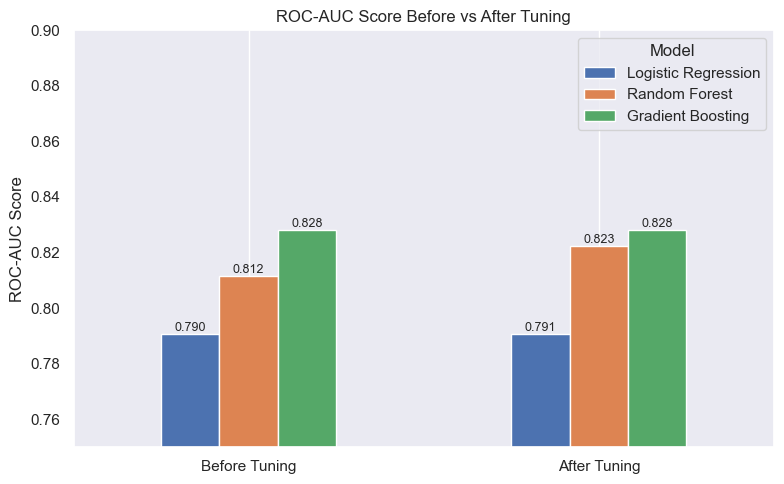

In [123]:
# Visual for pre and post tuning of roc auc score

pre_tuning_roc_auc = {
    'Logistic Regression': 0.7905,
    'Random Forest': 0.8117,
    'Gradient Boosting': 0.8282
}

post_tuning_roc_auc = {
    'Logistic Regression': roc_auc_score(y_test, grid_lr.best_estimator_.predict_proba(X_test)[:, 1]),
    'Random Forest': roc_auc_score(y_test, grid_rf.best_estimator_.predict_proba(X_test)[:, 1]),
    'Gradient Boosting': roc_auc_score(y_test, grid_gb.best_estimator_.predict_proba(X_test)[:, 1])
}

# Combine into one DataFrame
roc_df = pd.DataFrame({
    'Before Tuning': pre_tuning_roc_auc,
    'After Tuning': post_tuning_roc_auc
})

roc_df = roc_df.T  # transpose for bar plot
# Plot
ax = roc_df.plot(kind='bar', figsize=(8, 5), rot=0)
plt.title("ROC-AUC Score Before vs After Tuning")
plt.ylabel("ROC-AUC Score")
plt.ylim(0.75, 0.90)
plt.grid(axis='y')
plt.legend(title="Model")

# Add annotations
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height:.3f}", 
                (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

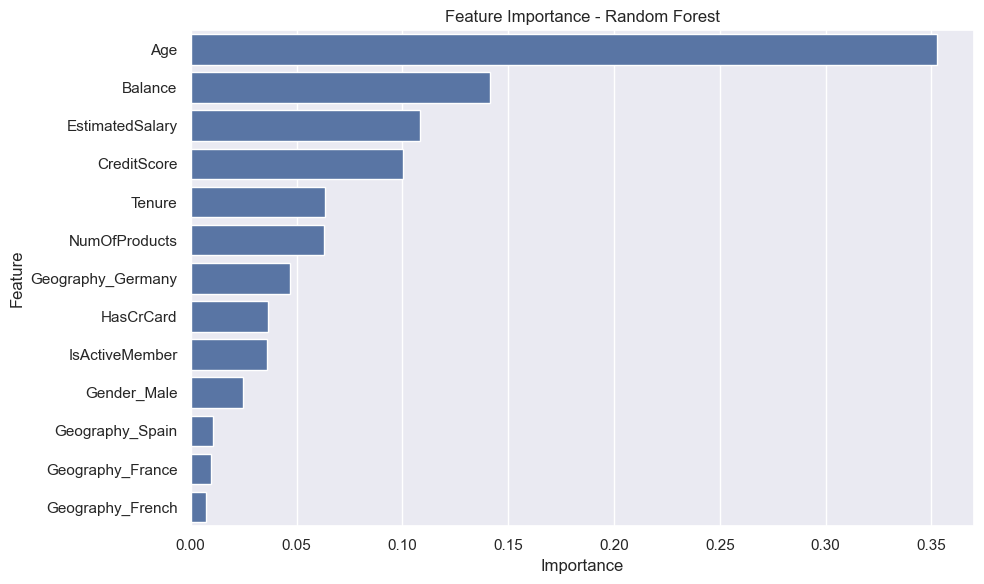

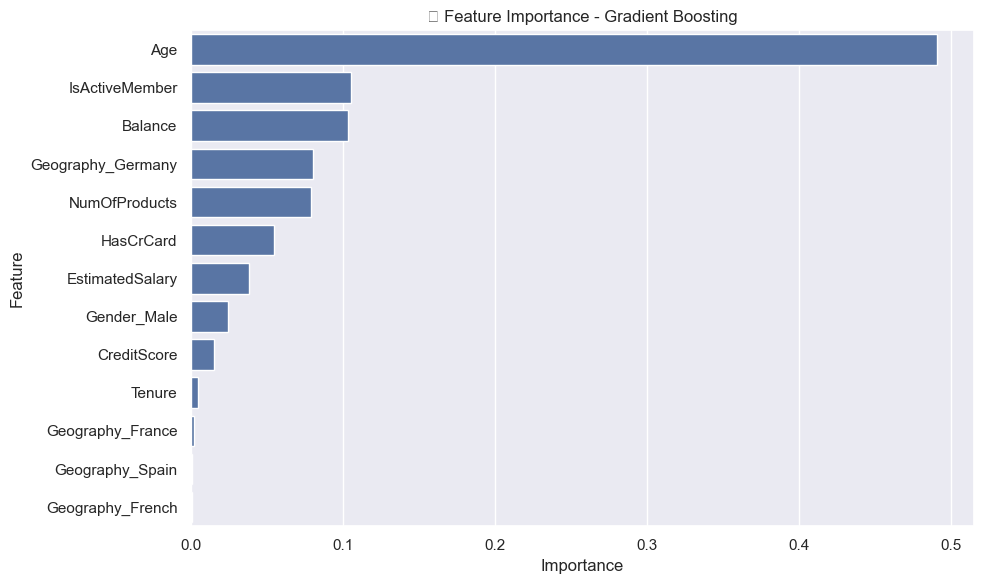

In [129]:
# Finding the feature importance which helps the stakeholders to find which feature drives the churn
# Extract feature importances
rf_importance = grid_rf.best_estimator_.named_steps['clf'].feature_importances_
features = X_train.columns

# Create DataFrame
rf_feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': rf_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=rf_feat_imp_df)
plt.title('Feature Importance - Random Forest')
plt.tight_layout()
plt.show()


# Extract feature importances
gb_importance = grid_gb.best_estimator_.named_steps['clf'].feature_importances_

# Create DataFrame
gb_feat_imp_df = pd.DataFrame({
    'Feature': features,
    'Importance': gb_importance
}).sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=gb_feat_imp_df)
plt.title(' Feature Importance - Gradient Boosting')
plt.tight_layout()
plt.show()


### Result of tuning models(did it improved model performance)

Yes, Only for Random Forest it improved noticeably. LR & GB remained almost same.

### Reason for choosing ROC-AUC score

1) Target variable is imabalanced.(Accuracy can misslead) ROC-AUC measures the ability of model to distinguish between classes, regardless of imbalance.

2) Evaluates the trade off between TPR and FPR.

3) ROC - AUC score ensures models comparisions focused on true discriminatory power, handles class imabalnce and is not biased by any thershold choices.


### Actionable Insight for Customer Retention Strategy

1) Target Older Customers - Since Age has stronger positive correlation with churn, we can launch age specific benefits like health insurance tie ups,
wealth advisory, personalized engagement to elder customer who may feel disconnected.

2) Focus on high credit score customer - some customer with high credit score still churns. These are like may be financial savvy users, we can offer them premium financial product, credit card upgrading or loyality rewards to keep them engaged.

3) Engage customer with fewer product - We can do this by using cross selling strategies like promote saving account, credit cards, loan or any investment.

4) Create Predictive alert using model - ROC-AUC optimized model can identify high risk customer so we can integrate model into bank CRM system and trriger retention things( mail,call,message) whenever high churn risk score is detected.

5) Exit Interview of churned customers to understand the issue they faced while they were associated with bank.


### Conclusion

## Summary of Key Findings

1) The dataset showed a churn rate of 20.4%, indicating class imbalance.

2) Age, IsActiveMember, and NumOfProducts were the top features influencing churn.

3) Customers who were older, less active, or had fewer bank products were more likely to churn.

4) Gradient Boosting achieved the highest ROC-AUC score after hyperparameter tuning and was selected as the best model.

5) The model enables the bank to identify and retain high-risk customers through targeted engagement.

### Real world Application of this project

1) Customer Retention Campaigns - Banks can proactively reach out to high-risk customers identified by the model with personalized offers, loyalty programs, or any other support.

2) Churn Risk Dashboard for Relationship Managers - A real-time dashboard showing churn risk scores allows bank staff to prioritize at-risk customers.

3) Automated Alerts and CRM Integration - The model can be integrated with the bank's CRM to trigger automated alerts for at-risk customers, enabling timely intervention.

4)  Strategic Business Decisions - Churn insights can guide decisions around new service rollouts, or personalized banking experiences.




